In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
# import some data to play with
df = pd.read_csv('/content/Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df=pd.get_dummies(df,columns=['ShelveLoc'])

In [7]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,Yes,Yes,1,0,0
1,11.22,111,48,16,260,83,65,10,Yes,Yes,0,1,0
2,10.06,113,35,10,269,80,59,12,Yes,Yes,0,0,1
3,7.40,117,100,4,466,97,55,14,Yes,Yes,0,0,1
4,4.15,141,64,3,340,128,38,13,Yes,No,1,0,0


In [8]:
# Considering different sales value, Good Sales >= 9.32, Average Sales >5.39 and <9.32, Poor Sales <=5.39

In [9]:
# Classifying sales into categorical data type
sales_result = []
for value in df["Sales"]:
    if value >= 9.32:
        sales_result.append("Good Sales")
    elif value < 9.32 and value > 5.39:
        sales_result.append("Average Sales")
    else:
        sales_result.append("Poor Sales")
       
df["sales_result"] = sales_result   
print(df)

     Sales  CompPrice  Income  ...  ShelveLoc_Good  ShelveLoc_Medium   sales_result
0     9.50        138      73  ...               0                 0     Good Sales
1    11.22        111      48  ...               1                 0     Good Sales
2    10.06        113      35  ...               0                 1     Good Sales
3     7.40        117     100  ...               0                 1  Average Sales
4     4.15        141      64  ...               0                 0     Poor Sales
..     ...        ...     ...  ...             ...               ...            ...
395  12.57        138     108  ...               1                 0     Good Sales
396   6.14        139      23  ...               0                 1  Average Sales
397   7.41        162      26  ...               0                 1  Average Sales
398   5.94        100      79  ...               0                 0  Average Sales
399   9.71        134      37  ...               1                 0     Goo

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   Urban             400 non-null    object 
 9   US                400 non-null    object 
 10  ShelveLoc_Bad     400 non-null    uint8  
 11  ShelveLoc_Good    400 non-null    uint8  
 12  ShelveLoc_Medium  400 non-null    uint8  
 13  sales_result      400 non-null    object 
dtypes: float64(1), int64(7), object(3), uint8(3)
memory usage: 35.7+ KB


In [11]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['sales_result']= label_encoder.fit_transform(df['sales_result']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,sales_result
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0,1
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0,1
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1,1
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1,0
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0,2


In [12]:
x=df.iloc[:,1:14]
y=df['sales_result']

In [13]:
print(x.head())
print(y.head())

   CompPrice  Income  ...  ShelveLoc_Medium  sales_result
0        138      73  ...                 0             1
1        111      48  ...                 0             1
2        113      35  ...                 1             1
3        117     100  ...                 1             0
4        141      64  ...                 0             2

[5 rows x 13 columns]
0    1
1    1
2    1
3    0
4    2
Name: sales_result, dtype: int64


In [14]:
df.sales_result.value_counts()

0    198
1    102
2    100
Name: sales_result, dtype: int64

In [15]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'sales_result']

In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [17]:
# Building decision tree using Gini method

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=8)

In [19]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

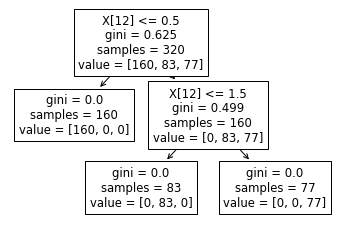

In [20]:
#Ploting the decision tree
tree.plot_tree(model_gini);

In [21]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

1.0

In [22]:
# Building decision tree using regression method(If we would have taken sales as numerical value)

In [23]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [24]:
array = df.values
X = array[:,1:12]
y = array[:,0]
array
print(X)
print(y)

[[138.  73.  11. ...   1.   1.   0.]
 [111.  48.  16. ...   1.   0.   1.]
 [113.  35.  10. ...   1.   0.   0.]
 ...
 [162.  26.  12. ...   1.   0.   0.]
 [100.  79.   7. ...   1.   1.   0.]
 [134.  37.   0. ...   1.   0.   1.]]
[ 9.5  11.22 10.06  7.4   4.15 10.81  6.63 11.85  6.54  4.69  9.01 11.96
  3.98 10.96 11.17  8.71  7.58 12.29 13.91  8.73  6.41 12.13  5.08  5.87
 10.14 14.9   8.33  5.27  2.99  7.81 13.55  8.25  6.2   8.77  2.67 11.07
  8.89  4.95  6.59  3.24  2.07  7.96 10.43  4.12  4.16  4.56 12.44  4.38
  3.91 10.61  1.42  4.42  7.91  6.92  4.9   6.85 11.91  0.91  5.42  5.21
  8.32  7.32  1.82  8.47  7.8   4.9   8.85  9.01 13.39  7.99  9.46  6.5
  5.52 12.61  6.2   8.55 10.64  7.7   4.43  9.14  8.01  7.52 11.62  4.42
  2.23  8.47  8.7  11.7   6.56  7.95  5.33  4.81  4.53  8.86  8.39  5.58
  9.48  7.45 12.49  4.88  4.11  6.2   5.3   5.07  4.62  5.55  0.16  8.55
  3.47  8.98  9.    6.62  6.67  6.01  9.31  8.54  5.08  8.8   7.57  7.37
  6.87 11.67  6.88  8.19  8.87  9.34 11.27 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [26]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
#Find the accuracy
model.score(X_test,y_test)

0.37588015313738576